# An Analysis of the 2019 Stack Overflow Survey Data

---
With nearly 90,000 responses fielded from over 170 countries and dependent territories, Stack Overflow Annual Developer Survey continues to be the most comprehensive survey of software developers ever conducted. The survey covers aspects such as career satisfaction and job search to programming languages.

In this project, I hope to cover the following questions using the data from the survey results:

* What is the programming language of choice?
* What's the pay for developers like?
* What is the framework of choice for developers?

As someone who is an aspiring data scientist, I am eager to discover anything interesting from this data set and to gain on overview of the characteristics seasoned developers and data scientists across the globe possess or value.

---

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# set style
plt.style.use('fivethirtyeight')

## 1. Understanding the Data

In [2]:
# read csv data into dataframe
df = pd.read_csv('survey_results_public.csv')
df.head() # take a look at the top five rows

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [3]:
# size of data
df.shape

(88883, 85)

---
Altogether, the survey had 88,883 respondents and there were 85 questions in the 20-minutes long survey.

---

In [4]:
# take a look at the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              88883 non-null  int64  
 1   MainBranch              88331 non-null  object 
 2   Hobbyist                88883 non-null  object 
 3   OpenSourcer             88883 non-null  object 
 4   OpenSource              86842 non-null  object 
 5   Employment              87181 non-null  object 
 6   Country                 88751 non-null  object 
 7   Student                 87014 non-null  object 
 8   EdLevel                 86390 non-null  object 
 9   UndergradMajor          75614 non-null  object 
 10  EduOther                84260 non-null  object 
 11  OrgSize                 71791 non-null  object 
 12  DevType                 81335 non-null  object 
 13  YearsCode               87938 non-null  object 
 14  Age1stCode              87634 non-null

---
Some of the features may not be self-explanatory however, Stack Overflow has very kindly provided a [schema](https://insights.stackoverflow.com/survey) which succintly explains what each of the features mean. Below are some explanations of the features included in the data set.

---

In [5]:
schema = pd.read_csv('survey_results_schema.csv')
schema.head() # view the first five rows of the schema

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open sour...


In [6]:
# check for null values
df.isna().sum().sort_values(ascending=False)

BlockchainOrg         40708
CodeRevHrs            39093
ConvertedComp         33060
CompTotal             32938
MiscTechWorkedWith    29297
                      ...  
MainBranch              552
Country                 132
OpenSourcer               0
Hobbyist                  0
Respondent                0
Length: 85, dtype: int64

---
We can also see that there are only three columns with zero null values, one of which, the `Respondent` column is auto-generated and randomly assigned. Perhaps the other two columns, `Hobbyist` and `OpenSourcer` were compulsory questions surveyees had to answer.

---
## What is the Programming Language of choice among Data Scientists?

With so many programming languages on the market, with each of their own unique use cases and features, it can be quite daunting for many who are just starting out. 

Therefore, I think it would be very interesting and helpful to see what developers around the world are using and the most common and desirable languages to have under their toolbelt. It would also be helpful to segregate the languages with respect to their importance in certain industries and specific to their use cases.

Let's take a look at the `LanguageWorkedWith` feature.

* `LanguageWorkedWith` - Which of the following programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year?  (If you both worked with the language and want to continue to do so, please check both boxes in that row.)

---

In [7]:
df['LanguageWorkedWith'].value_counts()

HTML/CSS;JavaScript;PHP;SQL                                                        1483
C#;HTML/CSS;JavaScript;SQL                                                         1414
HTML/CSS;JavaScript                                                                1247
C#;HTML/CSS;JavaScript;SQL;TypeScript                                               990
Java                                                                                934
                                                                                   ... 
Bash/Shell/PowerShell;Clojure;Go;JavaScript;Python;R;Rust;WebAssembly;Other(s):       1
C;C#;Go;HTML/CSS;Java;JavaScript;PHP;Python;SQL;TypeScript                            1
C;C++;Java;Objective-C;Python;R;Scala;Swift                                           1
Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;Python;SQL;WebAssembly                   1
Assembly;Bash/Shell/PowerShell;C;C#;HTML/CSS;Java;JavaScript;PHP;SQL;Other(s):        1
Name: LanguageWorkedWith, Length

In [8]:
# let's see how many unique categories there are
len(df['LanguageWorkedWith'].unique())

20099

---
With about 20,000 unique categories, it makes more sense to view the top 10 most popular languages worked with.

---

In [9]:
toptenLanguages = df['LanguageWorkedWith'].value_counts()[:10].to_frame().reset_index().rename(columns={'index': 'LanguageWorkedWith',
                                                                                                        'LanguageWorkedWith': 'Count'})
toptenLanguages

,LanguageWorkedWith,Count
0,HTML/CSS;JavaScript;PHP;SQL,1483
1,C#;HTML/CSS;JavaScript;SQL,1414
2,HTML/CSS;JavaScript,1247
3,C#;HTML/CSS;JavaScript;SQL;TypeScript,990
4,Java,934
5,HTML/CSS;JavaScript;PHP,910
6,Python,759
7,HTML/CSS;JavaScript;TypeScript,703
8,HTML/CSS;Java;JavaScript;SQL,671
9,C#,563


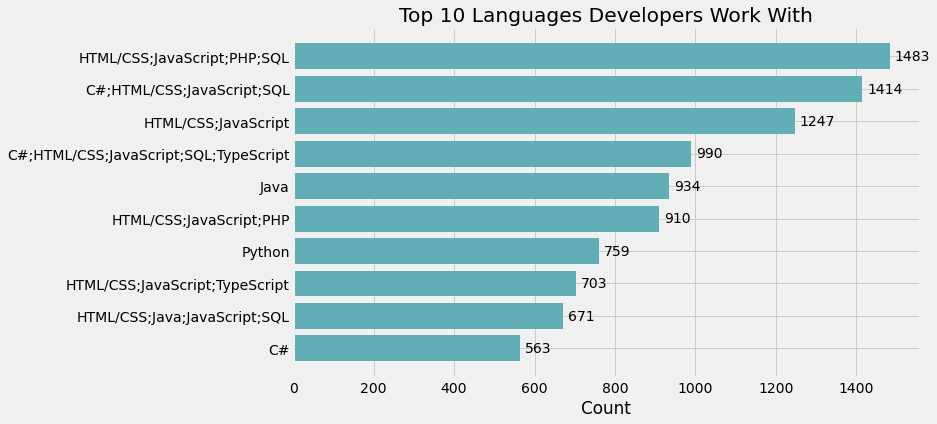

In [10]:
# plot a bar chart/count plot
plt.figure(figsize=(10, 6))

barchart = plt.barh('LanguageWorkedWith', 'Count', data=toptenLanguages.sort_values(by='Count', ascending=True), color='#61aeb7')

def autolabel(rects):
    for rect in rects:
        width = rect.get_width()
        
        plt.annotate('{}'.format(width),
                    xy=(width, rect.get_y()),
                    xytext=(5, 6),
                    textcoords='offset points',
                    ha='left',
                    va='bottom')

autolabel(barchart) 

plt.title('Top 10 Languages Developers Work With')
plt.xlabel('Count')
plt.show()

---
We can see that the programming languages are concatenated together. It makes sense as developers often use multiple languages in their careers. 

However, in order to get a better picture some cleaning needs to be done on the `LanguageWorkedWith` column.

---

In [11]:
languages = df['LanguageWorkedWith'][df['LanguageWorkedWith'].notnull()]

# split the string values in LanguageWorkedWith
languages = languages.apply(lambda s: str(s).split(';'))

unique_languages = {}

for lang in languages:
    for l in lang:
        if l not in unique_languages:
            unique_languages[l] = 1
        else:
            unique_languages[l] += 1

# view the dictionary
unique_languages

{'HTML/CSS': 55466,
 'Java': 35917,
 'JavaScript': 59219,
 'Python': 36443,
 'C++': 20524,
 'C': 18017,
 'C#': 27097,
 'SQL': 47544,
 'VBA': 4781,
 'R': 5048,
 'Bash/Shell/PowerShell': 31991,
 'Ruby': 7331,
 'Rust': 2794,
 'TypeScript': 18523,
 'WebAssembly': 1015,
 'Other(s):': 7920,
 'Go': 7201,
 'PHP': 23030,
 'Assembly': 5833,
 'Kotlin': 5620,
 'Swift': 5744,
 'Objective-C': 4191,
 'Elixir': 1260,
 'Erlang': 777,
 'Clojure': 1254,
 'F#': 973,
 'Scala': 3309,
 'Dart': 1683}

In [12]:
# convert dictionary into dataframe
unique_languages = pd.DataFrame.from_dict(unique_languages, 
                                          orient='index').sort_values(by=0, 
                                                                      ascending=False).reset_index().rename(columns={'index': 'Language', 
                                                                                                                     0: 'Count'})

# first five row 
unique_languages.head()

,Language,Count
0,JavaScript,59219
1,HTML/CSS,55466
2,SQL,47544
3,Python,36443
4,Java,35917


In [13]:
# create a function to plot a bar chart (we can use the code from above)
def plot_barchart(dataframe, x, y, title):

    # plot a bar chart/count plot
    plt.figure(figsize=(12, 12))
    plt.barh(y, x, data=dataframe.sort_values(by=x, ascending=True))

    plt.title(title)
    plt.xlabel(x)
    plt.show()

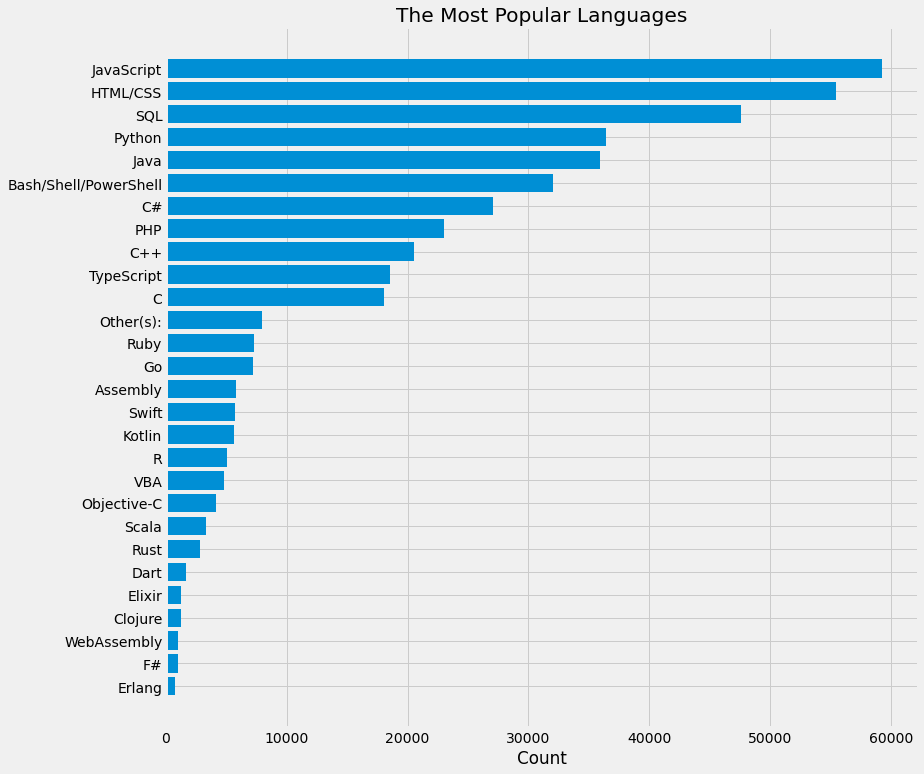

In [14]:
# let make a bar chart with our function
plot_barchart(unique_languages, 'Count', 'Language', 'The Most Popular Languages')

---
Now, this is a much better visualization and we can see some of the most popoular languages among developers. However, it does not help in answering which languages are the most popular for data science. To do so, let's take a look at the types of developers who took the survey.

* `DevType` - Which of the following describe you? Please select all that apply.

---

In [15]:
# get the DevType column without the null values
developers = df['DevType'][df['DevType'].notnull()]

# split the string values in DevType
developers = developers.apply(lambda s: str(s).split(';'))
developers

unique_dev = {}

for dev in developers:
    for d in dev:
        if d not in unique_dev:
            unique_dev[d] = 1
        else:
            unique_dev[d] += 1

# view the dictionary
unique_dev

{'Developer, desktop or enterprise applications': 17316,
 'Developer, front-end': 26649,
 'Designer': 9182,
 'Developer, back-end': 40665,
 'Developer, full-stack': 42222,
 'Academic researcher': 5930,
 'Developer, mobile': 14698,
 'Data or business analyst': 6294,
 'Data scientist or machine learning specialist': 6460,
 'Database administrator': 9520,
 'Engineer, data': 5819,
 'Engineer, site reliability': 2951,
 'Developer, QA or test': 6359,
 'DevOps specialist': 8862,
 'Developer, game or graphics': 4439,
 'Educator': 4492,
 'Student': 11921,
 'Engineering manager': 4202,
 'Senior executive/VP': 2107,
 'System administrator': 8929,
 'Developer, embedded applications or devices': 7248,
 'Product manager': 4032,
 'Scientist': 3617,
 'Marketing or sales professional': 975}

In [16]:
# convert dictionary into dataframe
unique_dev = pd.DataFrame.from_dict(unique_dev,
                                    orient='index').sort_values(by=0,
                                                                ascending=False).reset_index().rename(columns={'index': 'Developer', 
                                                                                                               0: 'Count'})

# first five row 
unique_dev.head()

,Developer,Count
0,"Developer, full-stack",42222
1,"Developer, back-end",40665
2,"Developer, front-end",26649
3,"Developer, desktop or enterprise applications",17316
4,"Developer, mobile",14698


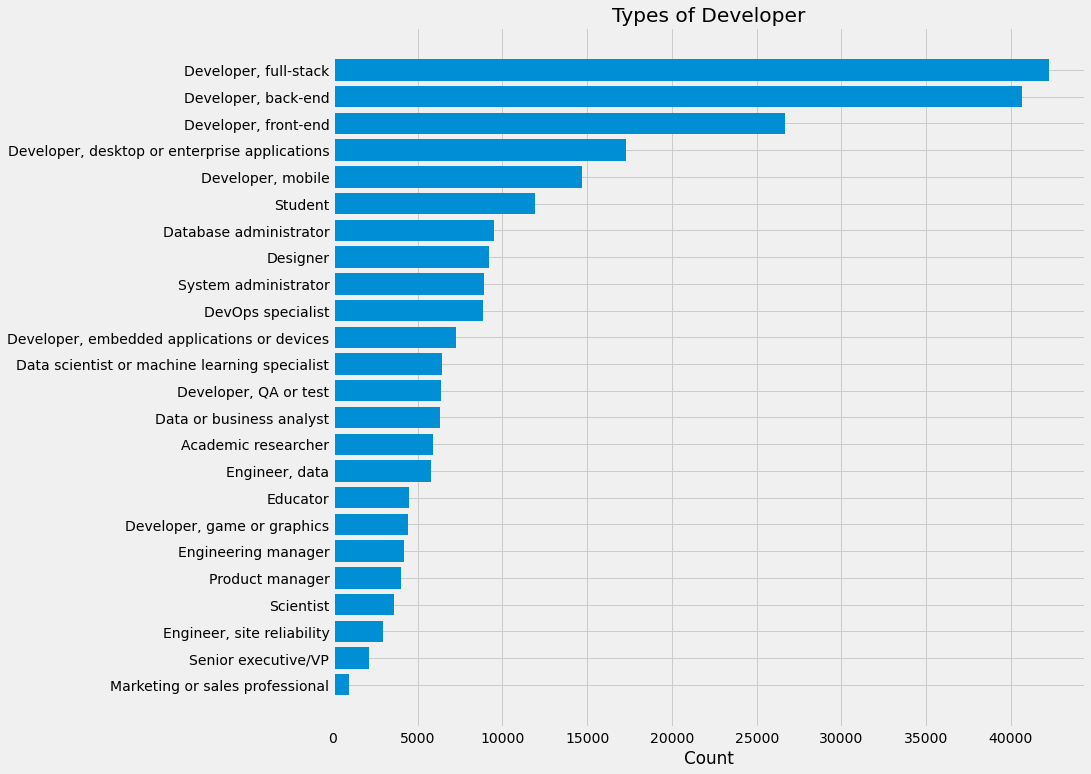

In [17]:
# let make a bar chart with our function
plot_barchart(unique_dev, 'Count', 'Developer', 'Types of Developer')

---
From the plot, we can see the different types of developers who took the survey. Since we're interested in developers in data science, we can see that the *Data Scientist or machine learning specialist* group suits our analysis. Therefore, we will be analyzing the languages that are popular in this group. 

---

In [18]:
# get rows with no null values in the LanguageWorkedWith and DevType columns
temp = df[df['DevType'].notnull()]
temp = temp[temp['LanguageWorkedWith'].notnull()]
temp = temp.reset_index().drop('index', axis=1)

# create dictionary of developer type as keys
dev_dict = {}
for devtype in unique_dev['Developer'].to_list():
    dev_dict[devtype] = {} # value as dictionary to store the type of languages as keys and count as values
    
# populate the dictionary with languages as keys
for devtype in dev_dict:
    dev_dict[devtype] = {lang: 0 for lang in unique_languages['Language'].to_list()}
    
# count the number of developers using the language
for ind, devs in enumerate(temp['DevType']):
    all_dev = devs.split(';')
    all_lang = temp.loc[ind, 'LanguageWorkedWith'].split(';')
    for dev in all_dev:
        for lang in all_lang:
            dev_dict[dev][lang] += 1
            
dev_lang_count = pd.DataFrame.from_dict(dev_dict, orient='index', dtype=None).transpose()
dev_lang_count.head()

,"Developer, full-stack","Developer, back-end","Developer, front-end","Developer, desktop or enterprise applications","Developer, mobile",Student,Database administrator,Designer,System administrator,DevOps specialist,...,Academic researcher,"Engineer, data",Educator,"Developer, game or graphics",Engineering manager,Product manager,Scientist,"Engineer, site reliability",Senior executive/VP,Marketing or sales professional
JavaScript,36376,29372,23376,11748,9953,7574,7436,7192,6558,6529,...,3217,3499,3151,3064,3040,3024,1764,2049,1600,700
HTML/CSS,33329,26605,22285,11178,9181,8122,7253,7243,6480,5907,...,3313,3286,3151,2946,2732,2900,1846,1853,1513,749
SQL,27674,26031,15630,11006,7536,6179,7778,5526,6066,5721,...,2820,3884,2557,2171,2538,2557,1599,1811,1351,575
Python,15406,16537,8442,6274,4685,6481,3945,3238,4586,4647,...,3621,3742,2112,1963,1969,1598,2513,1748,977,373
Java,17201,17904,10021,7739,8409,6482,3657,3621,3484,3651,...,2506,2484,1988,2012,1673,1429,1262,1198,766,322


---
Great! Now we have a dataframe of types of languages used by different types of developers. Let's take a look at which langugaes are the most common for Data Scientists and Machine Learning Specialists.

---

In [19]:
# get languages used by data scientists and machine learning specialist
df_lang_count = pd.DataFrame(dev_lang_count['Data scientist or machine learning specialist'])

# format the dataframe
df_lang_count.columns = ['Count']
df_lang_count = df_lang_count.sort_values(by='Count', ascending=False).reset_index().rename(columns={'index': 'Language'})
df_lang_count.head() # check first five rows

,Language,Count
0,Python,5125
1,SQL,3775
2,JavaScript,3319
3,HTML/CSS,3258
4,Bash/Shell/PowerShell,2874


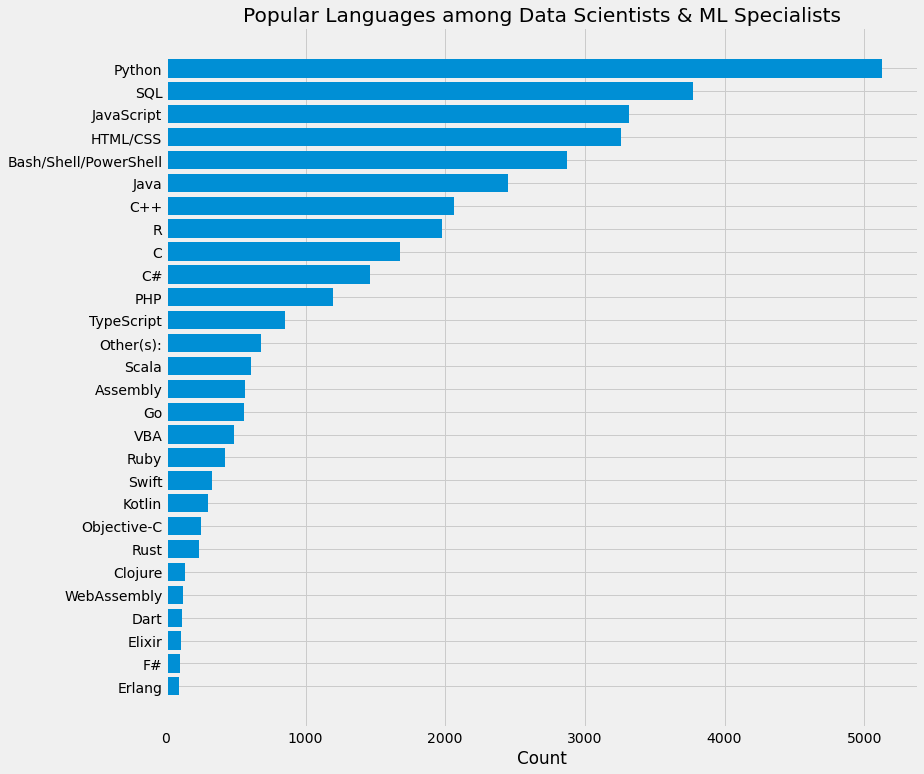

In [20]:
# let make a bar chart with our function
plot_barchart(df_lang_count, 'Count', 'Language', 'Popular Languages among Data Scientists & ML Specialists')

---
### Insight

Here we can easily see that Python, SQL and Javescript are the three most popular programming languages among Data Scientists and Machine Learning Specialists. It is also interesting to note that Python is the most popular language by a very large margin. 

Therefore, it should be duly noted for anyone aspiring to enter data science and machine learning that having proficiency in Python would definitely be a great tool to have under your belt. 

---

## What are the pay like for developers? 
---
From the schema, below are the columns that might help answer our interests in salaries among developers across the globe.

* `CompTotal` - What is your current total compensation (salary, bonuses, and perks, before taxes and deductions), in `CurrencySymbol`? Please enter a whole number in the box below, without any punctuation. If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty.

* `CurrencySymbol` - Which currency do you use day-to-day? If your answer is complicated, please pick the one you're most comfortable estimating in.

**Note:** It is important to note that due to currency conversions, `CompTotal` may not be the most ideal for comparison. Luckily, we have a normalized currency (in USD) in the `ConvertedComp` column.

* `ConvertedComp` - Salary converted to annual USD salaries using the exchange rate on 2019-02-01, assuming 12 working months and 50 working weeks.

* `Country` - In which country do you currently reside?

---

In [21]:
# create a salaries dataframe of developer types, their country and converted compensation in USD (for comparison sake)
salaries_df = df[['DevType', 'Country', 'ConvertedComp']]
salaries_df.head() # view first five rows

,DevType,Country,ConvertedComp
0,NaN,United Kingdom,NaN
1,"Developer, desktop or enterprise applications;...",Bosnia and Herzegovina,NaN
2,"Designer;Developer, back-end;Developer, front-...",Thailand,8820.0
3,"Developer, full-stack",United States,61000.0
4,"Academic researcher;Developer, desktop or ente...",Ukraine,NaN


In [22]:
# check for missing values
salaries_df.isnull().sum()

DevType           7548
Country            132
ConvertedComp    33060
dtype: int64

In [23]:
# mssing values in proportion
round((salaries_df.isnull().sum()/salaries_df.shape[0]) * 100, 1)

DevType           8.5
Country           0.1
ConvertedComp    37.2
dtype: float64

---
Seems like `ConvertedComp` has a lot of missing values (more than a third!) and a reason could be because surveyees not from the US had to manually convert their annual compensation for input. This could be a hassle for most. Another plausible reason could be due to privacy.

If you take a look at the survey data, some surveyees inputted values for `CompTotal` but not for `ConvertedComp`. Perhaps we could make use of the `CompTotal` and convert them into USD to input into `ConvertedComp`. 

---

In [24]:
temp = df[df['ConvertedComp'].isnull()] # only get those rows with missing ConvertedComp values
temp = temp[temp['CompTotal'].notnull()] # only get those rows without missing CompTotal values
temp[['CompTotal', 'ConvertedComp']].head()

,CompTotal,ConvertedComp
297,0.0,NaN
862,30000.0,NaN
885,1800.0,NaN
1557,7000.0,NaN
3598,0.0,NaN


---
After removing all rows with null values in `ConvertedComp` and retaining rows with entries in `CompTotal`, we find out that some values in the `CompTotal` are inputted as zeroes. In this context, these zeroes are as useful (or useless) as null values. Let's remove these values and reconsider if conversion to impute missing values in `ConvertedComp` is still worth it.

---

In [25]:
num = len(temp[temp['CompTotal'] != float(0)])
print(f'Entries available for conversion and imputation: {num}')

Entries available for conversion and imputation: 100


---
### Insight 

With only 100 entries that we will be able to impute and recover, it seems like it's not worth it so we will instead focus on distribution of salaries by countries.

---

In [26]:
# drop rows with missing values in salaries_df
cleaned_salaries = salaries_df.dropna().reset_index(drop=True)

# also drop rows with zero as entry in ConvertedComp column
cleaned_salaries = cleaned_salaries[cleaned_salaries['ConvertedComp'] != float(0)]
cleaned_salaries.head()

,DevType,Country,ConvertedComp
0,"Designer;Developer, back-end;Developer, front-...",Thailand,8820.0
1,"Developer, full-stack",United States,61000.0
2,Data or business analyst;Data scientist or mac...,Canada,366420.0
3,"Database administrator;Developer, back-end;Dev...",New Zealand,95179.0
4,Data or business analyst;Data scientist or mac...,India,13293.0


In [27]:
# check the shape
cleaned_salaries.shape

(54890, 3)

In [28]:
# let's view the countries the developers are from
countries_count = cleaned_salaries['Country'].value_counts().to_frame().reset_index().rename(columns={'index': 'Country',
                                                                                                      'Country': 'Count'})
countries_count

,Country,Count
0,United States,14726
1,United Kingdom,3962
2,India,3882
3,Germany,3728
4,Canada,2214
...,...,...
155,Brunei Darussalam,1
156,Timor-Leste,1
157,Liechtenstein,1
158,Guinea,1


---
We can see that quite a number of countries are under-represented with the United States having the largest respondents. Let's just take a closer look at the top nine countries with the most respondents.

---

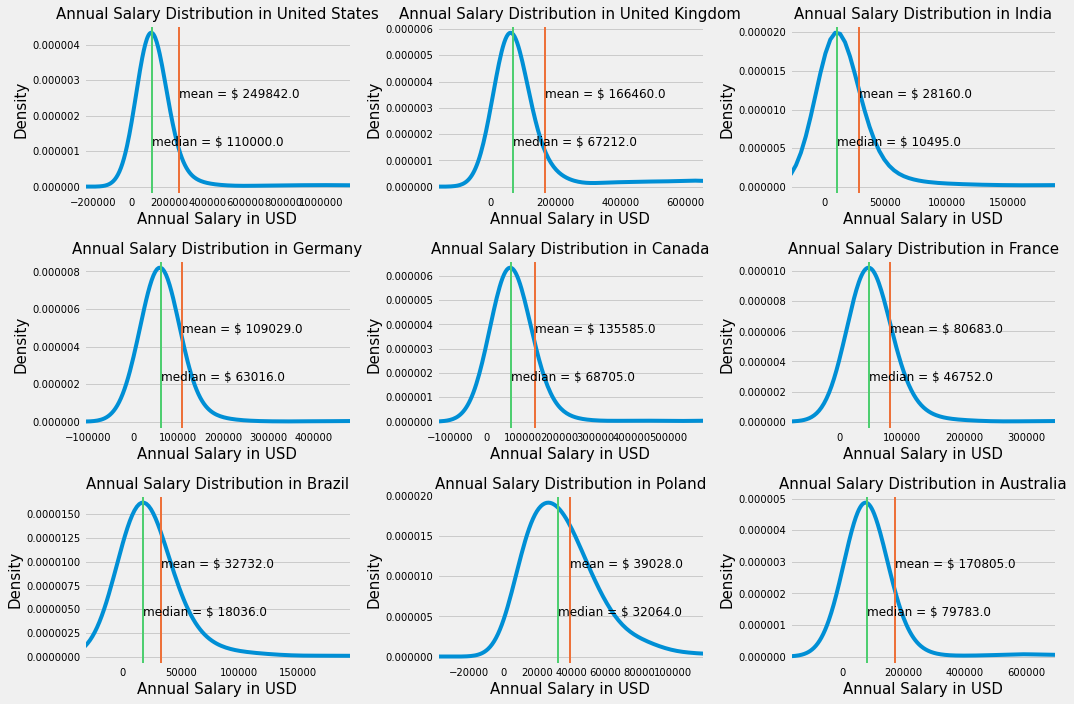

In [29]:
# plot the distributions of salaries across countries with top nine respondents
fig = plt.figure(figsize=(15, 10))

countries = countries_count['Country'].to_list()[:9]

for ind, country in enumerate(countries):
    plt.subplot(3, 3, ind+1) # 3 x 3 plots (9 in total) and iterate through the positions
    salaries_temp = cleaned_salaries.loc[cleaned_salaries['Country'] == country, 'ConvertedComp']
    
    ax = salaries_temp.plot(kind='kde')
    # red verticle line for mean salary
    ax.axvline(salaries_temp.mean(), linestyle='-', linewidth=2, color='#ed713a') 
    # yellow verticle line for median salary
    ax.axvline(salaries_temp.median(), linestyle='-', linewidth=2, color='#4ece70')
    
    ax.text((salaries_temp.mean()), 
            (float(ax.get_ylim()[1])*0.55), 'mean = $ ' + str(round(salaries_temp.mean(), 0)), fontsize = 12)
    ax.text((salaries_temp.median()), 
            (float(ax.get_ylim()[1])*0.25), 'median = $ ' + str(round(salaries_temp.median(), 0)), fontsize = 12)
    
    # set axis and title labels
    ax.set_ylabel('Density', fontsize=15)
    ax.set_xlabel('Annual Salary in USD', fontsize=15)
    ax.set_title(f'Annual Salary Distribution in {country}', fontsize=15)
    
    # limit xaxis
    ax.set_xlim(-salaries_temp.mean(), salaries_temp.mean() + 2 * salaries_temp.std())
    ax.tick_params(axis='both', which='major', labelsize=10) # resize xaxis ticks
    ax.ticklabel_format(style='plain') # remove scientific notation in yaxis
    ax.xaxis.grid(False) # remove xaxis grid
    
    
plt.tight_layout()
plt.show()

---
From the gaussian plot, we can see that salaries are all right-skewed which makes absolute sense as salaries can't be in the negative range. We can also deduce that developers in the United States have the highest salaries simply by comparing the mean and median salaries as shown in the plots. 

Similarly, it would be nice to see how salaries fare for data scientists and machine learning specialists.

---

In [30]:
# let's filter cleaned_salaries dataframe to include only top ten countries with the most respondents
# note that the visualization before only included the top nine countries with the most respondents
topten_countries = countries_count['Country'].to_list()[:10]
cleaned_salaries2 = cleaned_salaries[cleaned_salaries['Country'].isin(topten_countries)]
cleaned_salaries2

,DevType,Country,ConvertedComp
1,"Developer, full-stack",United States,61000.0
2,Data or business analyst;Data scientist or mac...,Canada,366420.0
4,Data or business analyst;Data scientist or mac...,India,13293.0
5,Data or business analyst;Database administrato...,United States,90000.0
6,"Developer, desktop or enterprise applications",Germany,57060.0
...,...,...,...
55072,Data scientist or machine learning specialist;...,Canada,72522.0
55073,Data scientist or machine learning specialist;...,United States,2000000.0
55074,"Developer, back-end;Developer, game or graphics",United States,180000.0
55075,Data scientist or machine learning specialist;...,United States,2000000.0


In [31]:
# create dictionary where keys are top ten countries with most respondents and values as dictionaries
country_salaries_dict = {country: {} for country in topten_countries}

# create dictionary as values in country_salaries_dict with developer type as keys and 
# empty list as values for all salaries from respondents
for devs, country in cleaned_salaries2[['DevType', 'Country']].values:
    for dev in devs.split(';'):
        if dev not in country_salaries_dict[country]:
            country_salaries_dict[country][dev] = []
            
# populate dictionary with salary by appending to list values
for devs, country, salary in cleaned_salaries2[['DevType', 'Country', 'ConvertedComp']].values:
    all_devs = devs.split(';')
    for dev in all_devs:
        country_salaries_dict[country][dev].append(salary)

In [32]:
# now let's visualize the salaries for data science related developers in the USA
dev_type = 'Data scientist or machine learning specialist'
country = 'United States'
ds_salaries = pd.DataFrame({'Annual Salary (USD)': country_salaries_dict['United States'][dev_type]})
ds_salaries

,Annual Salary (USD)
0,66750.0
1,100000.0
2,62000.0
3,9000.0
4,90000.0
...,...
1229,115500.0
1230,79500.0
1231,65000.0
1232,2000000.0


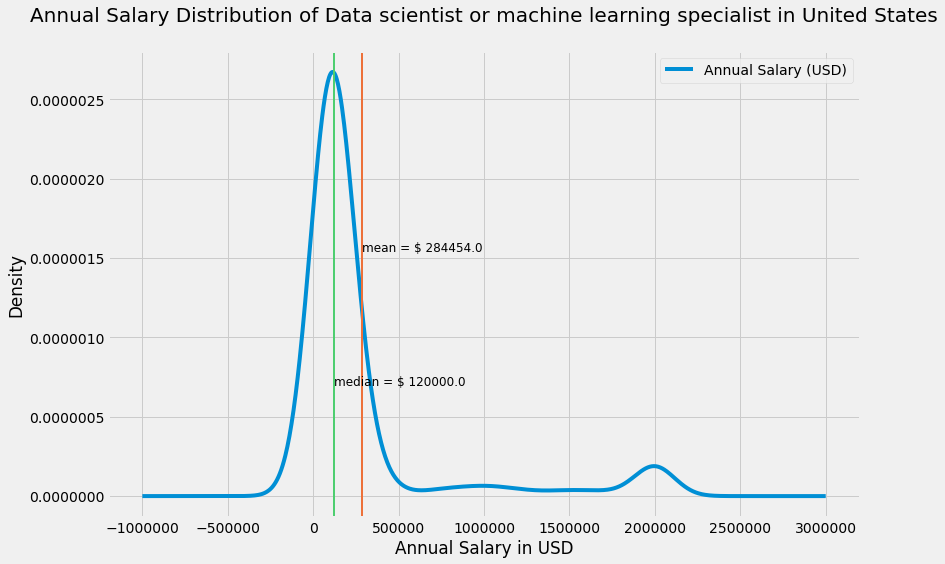

In [33]:
ax = ds_salaries.plot(kind='kde', figsize=(12, 8))
mean = ds_salaries['Annual Salary (USD)'].mean()
median = ds_salaries['Annual Salary (USD)'].median()

ax.axvline(mean, linestyle = '-', linewidth=2, color='#ed713a')
ax.axvline(median, linestyle = '-', linewidth=2, color='#4ece70')

ax.text(mean, (float(ax.get_ylim()[1])*0.55), 'mean = $ ' + str(round(mean, 0)), fontsize=12)
ax.text(median, (float(ax.get_ylim()[1])*0.25), 'median = $ ' + str(round(median, 0)), fontsize=12)

ax.set_xlabel('Annual Salary in USD')
ax.set_title(f'Annual Salary Distribution of {dev_type} in {country}', fontsize=20, y=1.05)
ax.ticklabel_format(style='plain') # remove scientific notation in axis



plt.show()

---
### Insight
Comparing this distribution density plot to the previous plot, we can see that the mean and median salaries for data scientists or machine learning specialists are **higher** than the overall mean and median salaries of developers in the United States.

---
## How does Popularity within Programming Languages vary with Coding Experience?
---

Let's investigate how popularity of programming languages vary among developers with different durations of experience. It is good to gain an insight as it can potentially reveal what languages developers value more as they gain more and more experience.

Below are some of the features we could make use of to answer our query.
* `YearsCode` - Including any education, how many years have you been coding?
* `YearsCodePro` - How many years have you coded professionally (as a part of your work)

However, we will be focusing on the `YearsCodePro` feature as we're interested in programming languages popularity among professionals.

---

In [34]:
# create new dataframe with DevType, LanguageWorkedWith and yearsCodePro
years_lang_df = df[['DevType', 'LanguageWorkedWith', 'YearsCodePro']]
years_lang_df.head() # check first five rows 

,DevType,LanguageWorkedWith,YearsCodePro
0,NaN,HTML/CSS;Java;JavaScript;Python,NaN
1,"Developer, desktop or enterprise applications;...",C++;HTML/CSS;Python,NaN
2,"Designer;Developer, back-end;Developer, front-...",HTML/CSS,1
3,"Developer, full-stack",C;C++;C#;Python;SQL,Less than 1 year
4,"Academic researcher;Developer, desktop or ente...",C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,9


In [35]:
# check missing values
years_lang_df.isna().sum()

DevType                7548
LanguageWorkedWith     1314
YearsCodePro          14552
dtype: int64

In [36]:
# since we're interested in respondents who code professionally as a career, 
# we will exclude data with null values in the DevType, LanguageWorkedWith and YearsCodePro columns
years_lang_df = years_lang_df[years_lang_df['DevType'].notnull()].reset_index(drop=True)
years_lang_df = years_lang_df[years_lang_df['LanguageWorkedWith'].notnull()].reset_index(drop=True)
years_lang_df = years_lang_df[years_lang_df['YearsCodePro'].notnull()].reset_index(drop=True)

In [37]:
# let's take a look at the entries for YearsCodePro
years_lang_df['YearsCodePro'].value_counts()

2                     7724
3                     7592
5                     6249
4                     6136
6                     4424
1                     4259
10                    4239
Less than 1 year      3708
7                     3575
8                     3379
12                    2166
15                    2054
20                    1960
9                     1941
11                    1646
13                    1342
18                    1143
14                    1109
16                     759
19                     754
25                     706
22                     667
17                     617
21                     533
30                     498
23                     437
24                     324
28                     213
35                     209
27                     192
26                     192
32                     166
29                     127
33                     126
31                     111
40                     102
34                     101
3

---

As you can see, there are many unique entries for years coding professionally and it would make much more sense to classify these entries into categories. Therefore, I would like to separate the results into categories as stated below:

* 0 to 3 years
* 4 to 7 years
* 8 to 10 years
* more than 10 years

Take note that some of the entries are *'Less than 1 year'* and *'More than 50 years'*. I will convert *'Less than 1 year'* to 0 and *'More than 50 years'* to 50.

---

In [38]:
# first convert string values in YearsCodePro into integers
years_lang_df['YearsCodePro'][years_lang_df['YearsCodePro'] == 'Less than 1 year' ] = 0
years_lang_df['YearsCodePro'][years_lang_df['YearsCodePro'] == 'More than 50 years' ] = 50

# convert YearsCodePro to int type
years_lang_df['YearsCodePro'] = years_lang_df['YearsCodePro'].astype(str).astype(int)

# check
years_lang_df['YearsCodePro'].value_counts()

2     7724
3     7592
5     6249
4     6136
6     4424
1     4259
10    4239
0     3708
7     3575
8     3379
12    2166
15    2054
20    1960
9     1941
11    1646
13    1342
18    1143
14    1109
16     759
19     754
25     706
22     667
17     617
21     533
30     498
23     437
24     324
28     213
35     209
26     192
27     192
32     166
29     127
33     126
31     111
40     102
34     101
38      77
36      74
37      59
39      51
50      29
42      23
43      22
41      22
45      16
44      11
48       7
46       4
49       4
47       3
Name: YearsCodePro, dtype: int64

In [39]:
# input categorical values into new column Experience
for ind, year in enumerate(years_lang_df['YearsCodePro']):
    if year <= 3:
        years_lang_df.loc[ind, 'Experience'] = '0 to 3 years'
    elif 4 <= year <= 7:
        years_lang_df.loc[ind, 'Experience'] = '4 to 7 years'
    elif 8 <= year <= 10:
        years_lang_df.loc[ind, 'Experience'] = '8 to 10 years'
    else: # anything more than 10 years of experience
        years_lang_df.loc[ind, 'Experience'] = 'more than 10 years'
        
years_lang_df

,DevType,LanguageWorkedWith,YearsCodePro,Experience
0,"Designer;Developer, back-end;Developer, front-...",HTML/CSS,1,0 to 3 years
1,"Developer, full-stack",C;C++;C#;Python;SQL,0,0 to 3 years
2,"Academic researcher;Developer, desktop or ente...",C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,9,8 to 10 years
3,Data or business analyst;Data scientist or mac...,Java;R;SQL,3,0 to 3 years
4,"Designer;Developer, front-end",HTML/CSS;JavaScript,4,4 to 7 years
...,...,...,...,...
71877,Student,Assembly;Bash/Shell/PowerShell;C;C#;HTML/CSS;J...,5,4 to 7 years
71878,"Academic researcher;Designer;Developer, game o...",C;C++;HTML/CSS;JavaScript;PHP;Python;SQL,3,0 to 3 years
71879,Academic researcher,HTML/CSS;Java;JavaScript,0,0 to 3 years
71880,"Designer;Developer, front-end;Developer, full-...",HTML/CSS;JavaScript;Python,15,more than 10 years


In [40]:
# view new Experience column
years_lang_df['Experience'].value_counts()

0 to 3 years          23283
4 to 7 years          20384
more than 10 years    18656
8 to 10 years          9559
Name: Experience, dtype: int64

In [41]:
# we can drop the YearsCodePro column
years_lang_df.drop('YearsCodePro', axis=1, inplace=True)

In [42]:
dev_dict = {}
for devs in years_lang_df['DevType']:
    for dev in devs.split(';'):
        dev_dict[dev] = {}
        
for devs, langs in years_lang_df[['DevType', 'LanguageWorkedWith']].values:
    all_devs = devs.split(';')
    all_langs = langs.split(';')
    for dev in all_devs:
        for lang in all_langs:
            dev_dict[dev][lang] = {}
            
for devs, langs, experience in years_lang_df[['DevType', 'LanguageWorkedWith', 'Experience']].values:
    all_devs = devs.split(';')
    all_langs = langs.split(';')
    for dev in all_devs:
        for lang in all_langs:
            if experience not in dev_dict[dev][lang]:
                dev_dict[dev][lang][experience] = 1
            else:
                dev_dict[dev][lang][experience] += 1

---
Similar to previous sections, we are interested in how popularity of programming languages changes as a data scientist get more experienced. So let's access our dictionary and extract out relevant informations relating to data scientists or machine learning specialists.

---

In [43]:
dev_type = 'Data scientist or machine learning specialist'
ds_lang_exp = dev_dict[dev_type]
ds_lang_exp = pd.DataFrame.from_dict(dev_dict[dev_type], orient='index', dtype=None)
ds_lang_exp

,0 to 3 years,more than 10 years,4 to 7 years,8 to 10 years
Java,703,535,547,254
R,649,388,498,244
SQL,1126,854,936,461
C#,366,385,358,174
Go,126,155,150,85
JavaScript,908,753,827,428
Python,1732,942,1254,576
C++,603,416,475,225
Bash/Shell/PowerShell,813,699,721,364
HTML/CSS,918,699,776,382


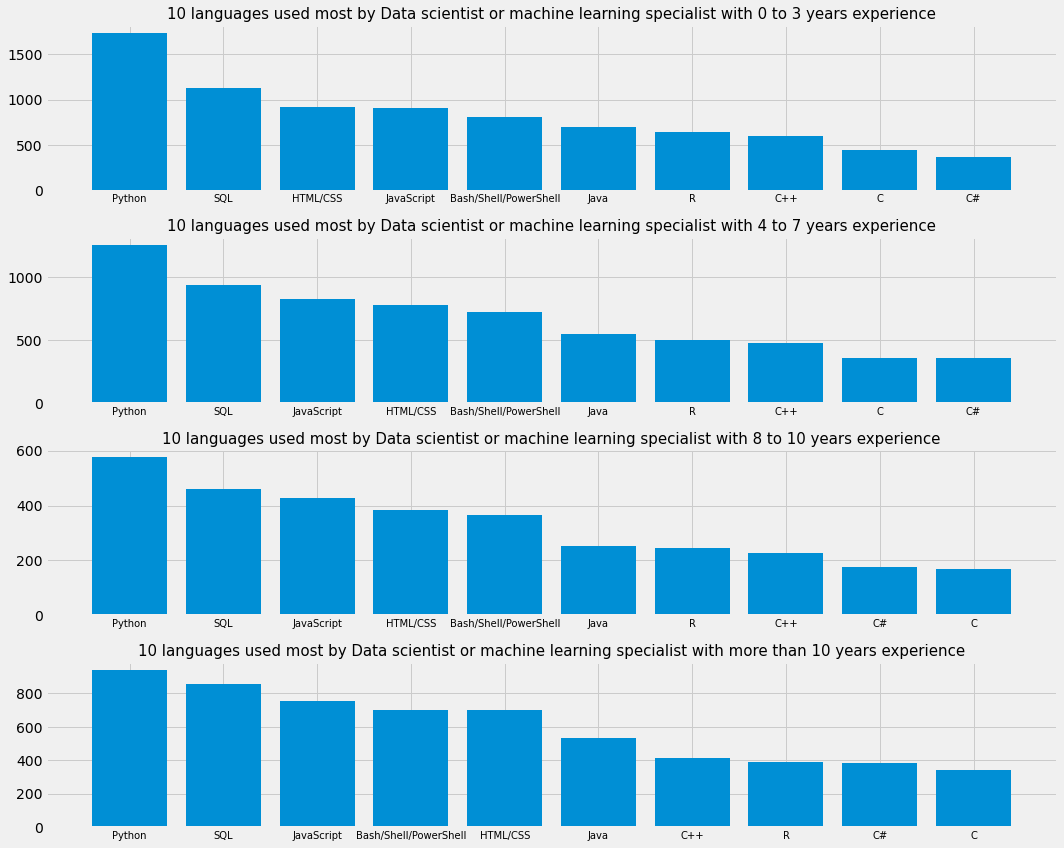

In [44]:
# let's plot some graphs to visualize how years of experience and preferences for programming languages changes
fig = plt.figure(figsize = (15, 12))

# plot preferences of languages for data scientists with 0 to 3 years of experience
plt.subplot(4, 1, 1)
plt.bar(x=np.arange(10), height=ds_lang_exp['0 to 3 years'].sort_values(ascending=False).head(10))
plt.xticks(np.arange(10), ds_lang_exp['0 to 3 years'].sort_values(ascending=False).head(10).index.tolist(),fontsize=10)
plt.title(f'10 languages used most by {dev_type} with 0 to 3 years experience', fontsize=15)

# plot preferences of languages for data scientists with 4 to 7 years of experience
plt.subplot(4, 1, 2)
plt.bar(x=np.arange(10), height=ds_lang_exp['4 to 7 years'].sort_values(ascending=False).head(10))
plt.xticks(np.arange(10), ds_lang_exp['4 to 7 years'].sort_values(ascending=False).head(10).index.tolist(),fontsize = 10)
plt.title(f'10 languages used most by {dev_type} with 4 to 7 years experience', fontsize=15)

# plot preferences of languages for data scientists with 8 to 10 years of experience
plt.subplot(4, 1, 3)
plt.bar(x=np.arange(10), height=ds_lang_exp['8 to 10 years'].sort_values(ascending=False).head(10))
plt.xticks(np.arange(10), ds_lang_exp['8 to 10 years'].sort_values(ascending=False).head(10).index.tolist(),fontsize = 10)
plt.title(f'10 languages used most by {dev_type} with 8 to 10 years experience', fontsize=15)

# plot preferences of languages for data scientists with more than 10 years of experience
plt.subplot(4, 1, 4)
plt.bar(x=np.arange(10), height=ds_lang_exp['more than 10 years'].sort_values(ascending=False).head(10))
plt.xticks(np.arange(10), ds_lang_exp['more than 10 years'].sort_values(ascending=False).head(10).index.tolist(),fontsize = 10)
plt.title(f'10 languages used most by {dev_type} with more than 10 years experience', fontsize=15)

plt.tight_layout()
plt.show()

---
### Insight

Well, it does seem like the languages used by data scientists are more or less similar with increasing years of experience. It is impressive how Python has been the most popular language regardless of years of professional career. That definitely says something about Python in the field of data science and for someone who is aspiring to become a data scientist, he or she might want to consider learning Python as their first language.

Other honourable mention to note includes SQL and JavaScript.

---

## How Satisfying Would A Career As A Developer Be?

For anyone who is looking to make a career switch, the decision to do so can be extremely difficult. One of the main drivers for people wanting to transition into a new career is unhappiness or unsatisfaction with their current career. Another reason could be to transition into a better paying career. 

Whatever the reason, we will be investigating how satisfied developers are with their careers.

---

In [45]:
sat_df = df[['DevType', 'JobSat', 'CareerSat']]
sat_df.head() # view first five rows

,DevType,JobSat,CareerSat
0,NaN,NaN,NaN
1,"Developer, desktop or enterprise applications;...",NaN,NaN
2,"Designer;Developer, back-end;Developer, front-...",Slightly satisfied,Slightly satisfied
3,"Developer, full-stack",Slightly satisfied,Very satisfied
4,"Academic researcher;Developer, desktop or ente...",Slightly dissatisfied,Very dissatisfied


---
Here are the descriptions for each of the column:
* `JobSat` - How satisfied are you with your current job? (If you work multiple jobs, answer for the one you spend the most hours on.)
* `CareerSat` - Overall, how satisfied are you with your career thus far?

---

In [46]:
sat_df.shape

(88883, 3)

In [47]:
# missing values
round(sat_df.isnull().sum() / len(sat_df) * 100, 2)

DevType       8.49
JobSat       20.13
CareerSat    18.04
dtype: float64

---
Interestingly enough, there are about 20% of the respondents who did not disclose the level of satisfaction in their jobs and 18% who did not disclose the level of satisfaction in their careers. However, a portion of these could be students or hobbyists who do not have a career as developers. Either way, we wil drop these null values.

---

In [48]:
# drop null values
sat_df = sat_df.dropna().reset_index(drop=True)
sat_df.shape

(69706, 3)

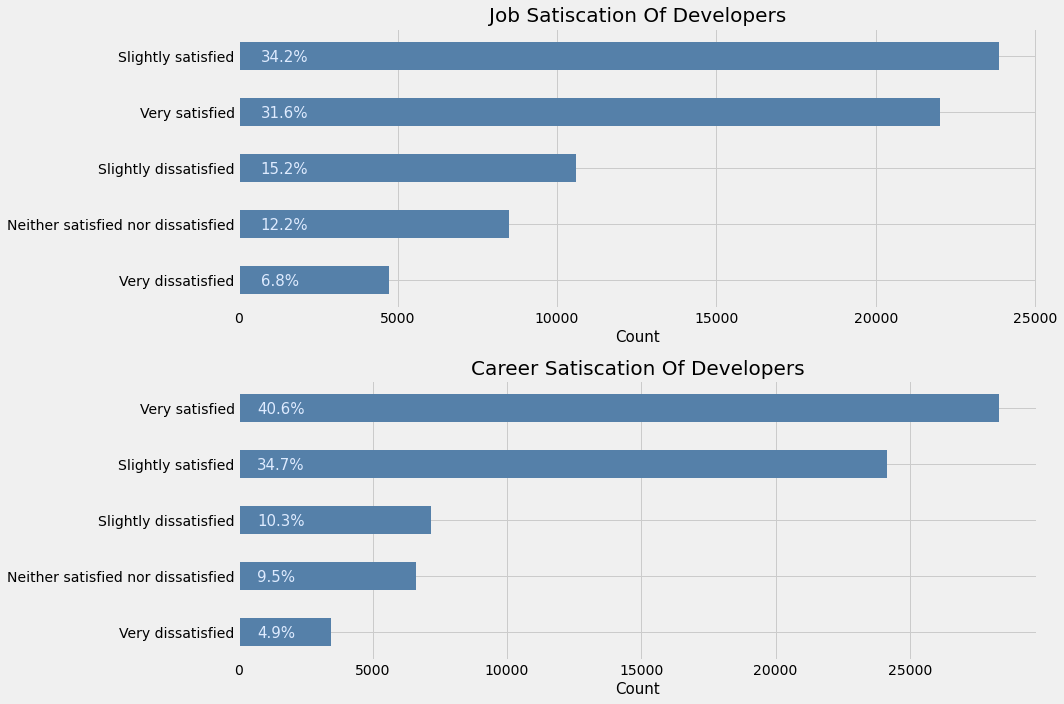

In [49]:
fig = plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
ax = sat_df['JobSat'].value_counts().sort_values(ascending=True).plot(kind='barh', color='#5580a9')
ax.set_title('Job Satiscation Of Developers', fontsize=20)
ax.set_xlabel('Count', fontsize=15)
for i in ax.patches:
    ax.text(700, i.get_y() + 0.15, str(round(i.get_width() / len(sat_df) * 100, 1)) + '%', color='#deebff', fontsize=15)


plt.subplot(2, 1, 2)
ax = sat_df['CareerSat'].value_counts().sort_values(ascending=True).plot(kind='barh', color='#5580a9')
ax.set_title('Career Satiscation Of Developers', fontsize=20)
ax.set_xlabel('Count', fontsize=15)
for i in ax.patches:
    ax.text(700, i.get_y() + 0.15, str(round(i.get_width() / len(sat_df) * 100, 1)) + '%', color='#deebff', fontsize=15)

plt.tight_layout()
plt.show()

---
### Insight

We see that a large portion of developers who took the survey are very satsified with their jobs and careers. However, there is also a comparable portion who are just slightly satisfied and about a quarter who are either dissatisfied or neutral.

While it is hard to generalize how satisfied a person would be with their job or career if he or she was a developer, it is safe to say satisfaction comes from within. With that said, if you are able to find any amount of joy in what you do, I'd say that's a win.

---